In [1]:
import numpy as np
import pandas as pd
import pyMelt as m
import matplotlib.pyplot as plt

In [2]:
lz = m.lithologies.matthews.klb1()
mantle = m.Mantle([lz],[1.0],['lz'])

In [3]:
column = mantle.AdiabaticMelt(1350.0, Pstart=2.0, steps=1001)

In [4]:
elements = m.chemistry.workman05_ddm

In [5]:
method = {}
for el in elements:
    method[el] = 'invmel'
method['Ba'] = 'continuous_instantaneous'
method['Rb'] = 'continuous_instantaneous'

In [ ]:
column.calculate_chemistry()#elements={'lz':elements})#,
#                            method=method,
#                            olv_D=m.chemistry.olv_D, 
#                            cpx_D=m.chemistry.cpx_D, opx_D=m.chemistry.opx_D, 
#                            spn_D=m.chemistry.spn_D, grt_D=m.chemistry.grt_D,
#                            plg_D=m.chemistry.plg_D,
#                            D={'Ba': m.chemistry.workman05_D['Ba'], 'Rb': m.chemistry.workman05_D['Rb']})

Lithology composition is set to the depleted mantle of Workman & Hart (2005).


In [7]:
morb = m.geosettings.SpreadingCentre(column)

In [8]:
morb.chemistry

Rb       0.397774
Ba       4.476551
Th       0.063640
U        0.025781
Nb       1.191608
Ta       0.077028
La       1.510184
Ce       4.243070
Pb       0.142784
Pr       0.802492
Nd       4.200763
Sr      59.169045
Zr      37.682194
Hf       1.052433
Sm       1.613747
Eu       0.638393
Ti    4208.986685
Gd       2.373533
Tb       0.450986
Dy       3.274165
Ho       0.741920
Y       20.218796
Er       2.119684
Yb       2.124928
Lu       0.326288
dtype: float64

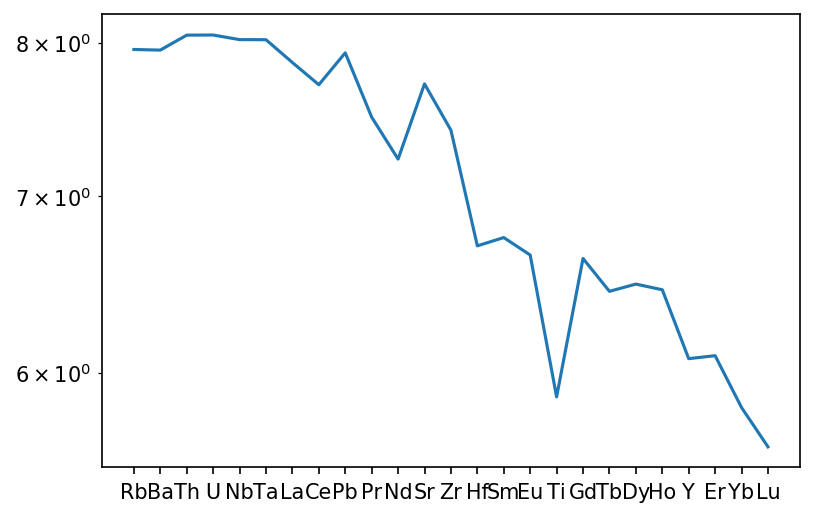

In [9]:
f,a = plt.subplots(dpi=150)
normed = []
for el in list(morb.chemistry.keys()):
    normed.append(morb.chemistry[el]/elements[el])
a.plot(range(len(morb.chemistry)), normed)
a.set_xticks(range(len(morb.chemistry)))
a.set_xticklabels(list(morb.chemistry.keys()))
a.set_yscale('log')
plt.show()

/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/pyMelt/geosettings.py:237: UserWarning: When homogenising instantaneous melts numerical error is likely to be introduced due to discretisation. This will affect the most incompatible elements most severely.
  warn("When homogenising instantaneous melts numerical error is likely to be "
/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/pyMelt/geosettings.py:237: UserWarning: When homogenising instantaneous melts numerical error is likely to be introduced due to discretisation. This will affect the most incompatible elements most severely.
  warn("When homogenising instantaneous melts numerical error is likely to be "
/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/pyMelt/geosettings.py:237: UserWarning: When homogenising instantaneous melts numerical error is likely to be introduced due to discretisation. This will affect the most incompatible elements most severely.
  warn("When homogenising inst

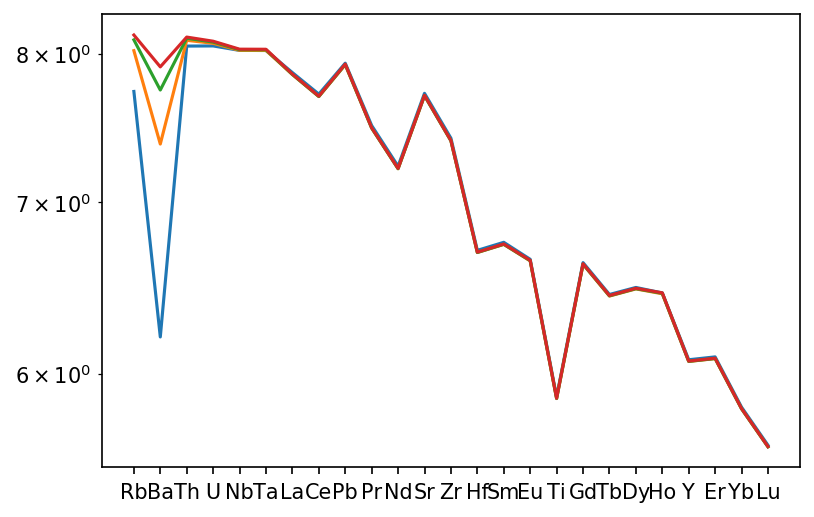

In [24]:
steps = [1000, 2000, 3000, 4000]
f,a = plt.subplots(dpi=150)
for i in range(len(steps)):
    column = mantle.AdiabaticMelt(1350.0, Pstart=2.0, steps=steps[i])
    column.calculate_chemistry(elements={'lz':elements}, method='invmel', output_type='instantaneous',
                           olv_D=m.chemistry.olv_D, 
                           cpx_D=m.chemistry.cpx_D, opx_D=m.chemistry.opx_D, 
                           spn_D=m.chemistry.spn_D, grt_D=m.chemistry.grt_D,
                           plg_D=m.chemistry.plg_D)
    morb = m.geosettings.SpreadingCentre(column)
    
    normed = []
    for el in list(morb.chemistry.keys()):
        normed.append(morb.chemistry[el]/elements[el])
    a.plot(range(len(morb.chemistry)), normed)
a.set_xticks(range(len(morb.chemistry)))
a.set_xticklabels(list(morb.chemistry.keys()))
a.set_yscale('log')
plt.show()

This bug is coming from the step size being too large to catch the Ba going into the melt before the solid is depleted. Need to find a way to catch it- or automatically rescale P to start at the solidus, with the appropriate number of steps.

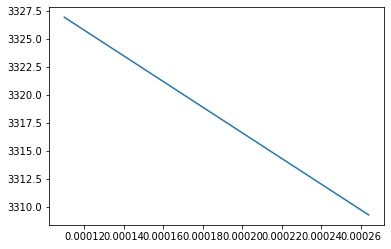

In [22]:
f,a = plt.subplots()
a.plot(column.lithologies['lz'].F, column.lithologies['lz'].Ba)
# a.set_yscale('log')

plt.show()

In [23]:
column.lithologies['lz'].F.loc[24]

0.00026397196272385213

In [50]:
Ba._cs

nan

In [34]:
np.array(column.lithologies['lz'].F[1:])-np.array(column.lithologies['lz'].F[:-1])

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.88391565e-05,
       5.84316746e-05, 7.07808526e-05, 7.99492600e-05, 8.73252242e-05,
       9.35270039e-05, 9.88917349e-05, 1.03625977e-04, 1.07866437e-04,
       1.11708738e-04, 1.15222614e-04, 1.18460611e-04, 1.21463385e-04,
      

In [36]:
column = mantle.AdiabaticMelt(1300.0)

In [37]:
Ba = m.chemistry.invmelSpecies('Ba', elements['Ba'], olv_D=m.chemistry.olv_D['Ba'], 
                               cpx_D=m.chemistry.cpx_D['Ba'], opx_D=m.chemistry.opx_D['Ba'], 
                               spn_D=m.chemistry.spn_D['Ba'], grt_D=m.chemistry.grt_D['Ba'],
                               plg_D=m.chemistry.plg_D['Ba'])

In [38]:
column.calculate_chemistry(species_objects={'lz':[Ba]}, output_type='instantaneous')

/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/pyMelt/chemistry.py:718: RuntimeWarning: overflow encountered in double_scalars
  cl = cs * (1 - X) / (Dbar - Pbar * X)
/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/pyMelt/chemistry.py:694: RuntimeWarning: overflow encountered in double_scalars
  dcsdX = cs * ((1 / (1 - X)) - (1 / (Dbar - Pbar * X)))
/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/pyMelt/chemistry.py:568: RuntimeWarning: invalid value encountered in double_scalars
  self._cs = self._cs + (1 / 6) * (state.F - self._F_prev) * (k1 + 2 * k2 + 2 * k3 + k4)


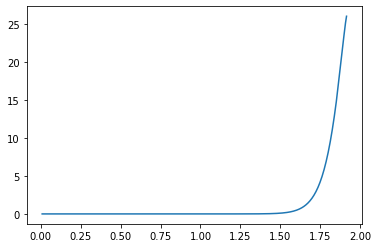

In [28]:
f,a = plt.subplots()
a.plot(column.lithologies['lz'].Pressure, column.lithologies['lz'].La)


plt.show()

In [6]:
Yb = m.chemistry.invmelSpecies('Yb', elements['Yb'], olv_D=m.chemistry.olv_D['Yb'], 
                               cpx_D=m.chemistry.cpx_D['Yb'], opx_D=m.chemistry.opx_D['Yb'], 
                               spn_D=m.chemistry.spn_D['Yb'], grt_D=m.chemistry.grt_D['Yb'],
                               plg_D=m.chemistry.plg_D['Yb'])

In [ ]:
column.calculate_chemistry(species_objects={'lz':[La, Yb]}, output_type='instantaneous')

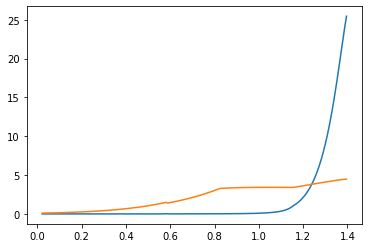

In [6]:
f,a = plt.subplots()
a.plot(column.lithologies['lz'].Pressure, column.lithologies['lz'].La)
a.plot(column.lithologies['lz'].Pressure, column.lithologies['lz'].Yb)
# a.plot(column.lithologies['lz'].Pressure, column.lithologies['lz'].La/column.lithologies['lz'].Yb)


plt.show()

In [10]:
La._GarnetSpinelTransition(1.4, 1320.0)

0

In [17]:
La._SpinelPlagioclaseTransition(1.1)

0.8333333333333336

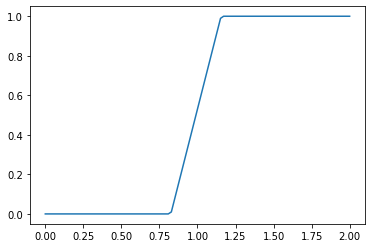

In [74]:
pp = np.linspace(0,2,100)
tt = np.zeros(np.shape(pp))
for i in range(len(pp)):
    tt[i] = La._SpinelPlagioclaseTransition(pp[i])
f,a = plt.subplots()
a.plot(pp, tt)
plt.show()

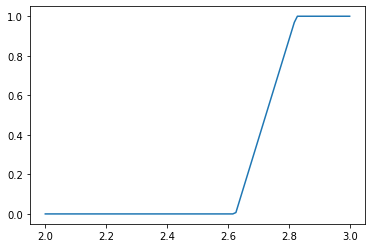

In [11]:
pp = np.linspace(2,3,100)
tt = np.zeros(np.shape(pp))
for i in range(len(pp)):
    tt[i] = La._GarnetSpinelTransition(pp[i], 1350.0)
f,a = plt.subplots()
a.plot(pp, tt)
plt.show()

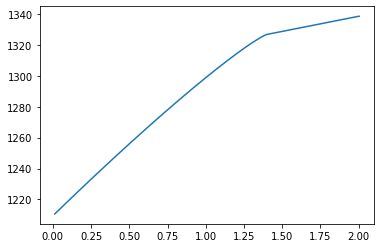

In [13]:
f,a = plt.subplots()
a.plot(column.lithologies['lz'].Pressure, column.lithologies['lz']['T'])
plt.show()


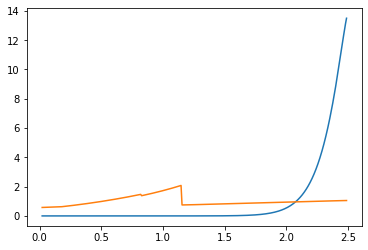

In [37]:
f,a = plt.subplots()
a.plot(column.lithologies['lz'].Pressure, column.lithologies['lz'].La)
a.plot(column.lithologies['lz'].Pressure, column.lithologies['lz'].Yb)

plt.show()

In [9]:
m.chemistry.klb1_MineralProportions

,olv,opx,cpx,grt,spn,plg
grt_field,0.609,0.125,0.119,0.147,0.000,0.00
spn_field,0.597,0.233,0.158,0.000,0.012,0.00
plg_field,0.646,0.208,0.076,0.000,0.000,0.07


In [10]:
spn_field = m.chemistry.klb1_MineralProportions.loc['spn_field']
plg_field = m.chemistry.klb1_MineralProportions.loc['plg_field']

In [11]:
sum(plg_field)

1.0

In [8]:
La.D

array([0.0005, 0.049 , 0.0031, 0.01  , 0.001 , 0.27  ])

In [9]:
Yb.D

array([5.0e-04, 4.9e-02, 3.1e-03, 1.0e-02, 6.6e+00, 2.7e-01])

In [26]:
any(np.array([-1,-2,-3]) > 0)

False

In [11]:
import scipy.integrate

In [13]:
scipy.integrate.trapz??

Signature: scipy.integrate.trapz(y, x=None, dx=1.0, axis=-1)
Docstring:
Integrate along the given axis using the composite trapezoidal rule.

Integrate `y` (`x`) along given axis.

Parameters
----------
y : array_like
    Input array to integrate.
x : array_like, optional
    The sample points corresponding to the `y` values. If `x` is None,
    the sample points are assumed to be evenly spaced `dx` apart. The
    default is None.
dx : scalar, optional
    The spacing between sample points when `x` is None. The default is 1.
axis : int, optional
    The axis along which to integrate.

Returns
-------
trapz : float
    Definite integral as approximated by trapezoidal rule.

See Also
--------
numpy.cumsum

Notes
-----
Image [2]_ illustrates trapezoidal rule -- y-axis locations of points
will be taken from `y` array, by default x-axis distances between
points will be 1.0, alternatively they can be provided with `x` array
or with `dx` scalar.  Return value will be equal to combined area un

In [22]:
any(item in ['Ba'] for item in elements.keys())

True